You are walking in the forest and see an iris and measure:

4.8,2.5,5.3,2.4

Is this an Iris Virginica or not?

The absolute minimum is to derive 4 probabilities for each feature. But it would be best to evaluate all 4 values in a (combined) equation to get one single probability for Iris Virginica! 

In [4]:
### source: https://drive.google.com/file/d/1huOxaKfmGpO8e4hdxWKI2gSyPbpqZxab/view
%matplotlib inline
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()
list(iris.keys())
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
X = iris["data"][:, 3:]  # petal width array([[0.2],[0.4],[0.3],[0.1],...])
y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0

# We now train the logistic regression model:
log_reg = LogisticRegression()
log_reg.fit(X, y)

/var/folders/jb/b4kcc8352qlcrywkmmp0fxtr0000gp/T/ipykernel_29543/4148932096.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0


LogisticRegression()

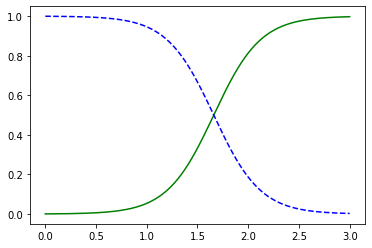

In [3]:
#The following picture gives the probabilities for flowers with petal wings varying from 0 to 3cm:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [6]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [22]:
log_reg.predict_proba([[2.5]]) 

array([[0.02563061, 0.97436939]])

zu 97,4%iger Wahrscheinlichkeit handelt es sich nach der **Petal Width** um eine Iris-Virginica.

In [29]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (0,1,2,3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1, x2, x3 = [[4.8]],[[2.5]],[[5.3]],[[2.4]]
X_new = np.c_[x0, x1, x2, x3]

y_proba = log_reg.predict_proba(X_new)

y_proba 

/var/folders/jb/b4kcc8352qlcrywkmmp0fxtr0000gp/T/ipykernel_29543/558730447.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


array([[1.39951162e-10, 1.00000000e+00]])

Mit fast 100%iger Wahrscheinlichkeit handelt es sich bei dem Datensatz um eine Iris Virginica.